In [1]:
import numpy
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
K.set_image_data_format('channels_first')

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# Reshape to be samples*pixels*width*height
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [5]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# One Hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [7]:
K.clear_session()

In [8]:
# Create model
def build_keras_model():
    K.clear_session()
    
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
kr_model = build_keras_model()
print(kr_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 24, 24)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 12, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 10, 10)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 5, 5)          0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [11]:
kr_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=17, batch_size=200)

Epoch 1/17
300/300 [==============================] - 2s 8ms/step - loss: 0.0818 - accuracy: 0.9747 - val_loss: 0.0462 - val_accuracy: 0.9844
Epoch 2/17
300/300 [==============================] - 2s 7ms/step - loss: 0.0631 - accuracy: 0.9808 - val_loss: 0.0404 - val_accuracy: 0.9869
Epoch 3/17
300/300 [==============================] - 2s 7ms/step - loss: 0.0520 - accuracy: 0.9835 - val_loss: 0.0300 - val_accuracy: 0.9907
Epoch 4/17
300/300 [==============================] - 2s 7ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0325 - val_accuracy: 0.9903
Epoch 5/17
300/300 [==============================] - 2s 7ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0260 - val_accuracy: 0.9913
Epoch 6/17
300/300 [==============================] - 2s 7ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0287 - val_accuracy: 0.9915
Epoch 7/17
300/300 [==============================] - 2s 7ms/step - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0257 - val_accuracy: 0.9923
Epoch 

In [13]:
# Final evaluation of the model
scores = kr_model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Large CNN Error: 0.70%


In [15]:
# evaluate performance against train/cross-val & test data
print('Evaluating performance of Keras model:')
loss, acc = kr_model.evaluate(X_train, y_train, batch_size=200)
print(' - Training dataset: loss = {:.4f}, accuracy = {:.4f}'.format(loss, acc))

loss, acc = kr_model.evaluate(X_test, y_test, batch_size=200)
print(' - Test dataset: loss = {:.4f}, accuracy = {:.4f}'.format(loss, acc))

Evaluating performance of Keras model:
300/300 [==============================] - 1s 4ms/step - loss: 0.0053 - accuracy: 0.9983
 - Training dataset: loss = 0.0053, accuracy = 0.9983
50/50 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 0.9930
 - Test dataset: loss = 0.0224, accuracy = 0.9930


In [17]:
#TEST single image
image = (X_test[1]).reshape(1,1,28,28) # 1->'2'    
model_pred = kr_model.predict_classes(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Prediction of model: 2


In [18]:
#TESTING multiple image
test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print ("Test images shape: {}".format(test_images.shape))

Test images shape: (4, 28, 28)


Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


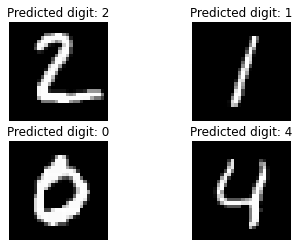

In [21]:
for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,1,28,28)
    prediction = kr_model.predict_classes(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

In [24]:
#SAVE THE MODEL

# serialize model to JSON
model_json = kr_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
kr_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
